## Pandas

### Spis treści:
* [Import biblioteki](#0)
* [Ćwiczenie 121](#1)
* [Ćwiczenie 122](#2)
* [Ćwiczenie 123](#3)
* [Ćwiczenie 124](#4)
* [Ćwiczenie 125](#5)
* [Ćwiczenie 126](#6)
* [Ćwiczenie 127](#7)
* [Ćwiczenie 128](#8)
* [Ćwiczenie 129](#9)
* [Ćwiczenie 130](#10)

### <a name='0'></a>Import biblioteki

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

sns.set()
np.__version__

'1.24.3'

In [2]:
!pip install pandas_datareader

Funkcja _fetch_financial_data()_ pobiera dane dotyczące notowań spółek giełdowych. Będzie wykorzystywana w poniższych ćwiczeniach. Aby pobrać dane konkretnej spółki należy przekazać odpowiedni ticker (symbol) spółki.

Kilka przykładowych tickerów spółek:
* AMZN - Amazon
* GOOGL - Google
* MSFT - Microsoft
* AAPL - Apple
* NKE - Nike
* WMT - Walmart

In [3]:
def fetch_financial_data(company='AMZN'):
    """
    This function fetches stock market quotations.
    """
    import pandas_datareader.data as web
    return web.DataReader(name=company, data_source='stooq')

### <a name='1'></a> Ćwiczenie 121
Wykorzystując funkcję _fetch_financial_data()_ pobierz notowania dla spółki Google (Alphabet) i przypisz do zmiennej _google_. Wyświetl obiekt _google_.

In [4]:
google = fetch_financial_data('GOOGL')
google

,Open,High,Low,Close,Volume
Date,,,,,
2025-03-24,167.0650,168.3200,165.1400,167.6800,30879129
2025-03-21,161.2050,164.2400,160.8901,163.9900,36625764
2025-03-20,161.5700,164.8900,160.9600,162.8000,28138464
2025-03-19,161.7600,165.8700,161.0000,163.8900,34275582
2025-03-18,163.6750,164.2500,156.7200,160.6700,42074751
...,...,...,...,...,...
2020-04-01,55.9970,56.2671,54.4770,54.9060,52158777
2020-03-31,57.2291,58.4580,56.6307,57.8877,65516064
2020-03-30,56.4274,57.3421,54.7261,57.1084,58949465


### <a name='2'></a> Ćwiczenie 122
Wyświetl podstawowe informacje na temat obiektu _google_.

In [5]:
google.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1255 entries, 2025-03-24 to 2020-03-26
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1255 non-null   float64
 1   High    1255 non-null   float64
 2   Low     1255 non-null   float64
 3   Close   1255 non-null   float64
 4   Volume  1255 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 58.8 KB


Wyświetl podstawowe statystyki o obiekcie _google_.

In [6]:
google.describe()

,Open,High,Low,Close,Volume
count,1255.000000,1255.000000,1255.000000,1255.000000,1.255000e+03
mean,123.778382,125.198351,122.447145,123.842540,3.237530e+07
std,33.135872,33.372331,32.861509,33.104284,1.357126e+07
min,54.801300,55.737500,53.559800,54.437700,9.346519e+06
25%,98.572650,100.332000,97.187650,99.011100,2.343727e+07
50%,123.578000,124.949000,122.177000,123.383000,2.920218e+07
75%,143.778000,144.968500,142.518000,143.526500,3.733341e+07
max,203.390000,207.050000,202.810000,206.380000,1.236458e+08


Zwróć uwagę na precyzję zapisu poszczególnych statystyk.
Spróbuj ustawić odpowiednie opcje biblioteki _pandas_, tak aby wyświetlać dane z dokładnością do dwóch miejsc po przecinku.

__Wskazówka:__
https://pandas.pydata.org/pandas-docs/stable/user_guide/options.html

In [ ]:
# tutaj wpisz rozwiązanie

__Dodatkowo:__
Poniższe ustawienie stłumi także notację wykładniczą (patrz kolumna _Volume_).

In [7]:
pd.options.display.float_format = '{:.2f}'.format
google.describe()

,Open,High,Low,Close,Volume
count,1255.00,1255.00,1255.00,1255.00,1255.00
mean,123.78,125.20,122.45,123.84,32375300.94
std,33.14,33.37,32.86,33.10,13571260.01
min,54.80,55.74,53.56,54.44,9346519.00
25%,98.57,100.33,97.19,99.01,23437269.00
50%,123.58,124.95,122.18,123.38,29202185.00
75%,143.78,144.97,142.52,143.53,37333408.00
max,203.39,207.05,202.81,206.38,123645829.00


Zbuduj wykres ceny zamknięcia (_Close_) dla obiektu _google_.

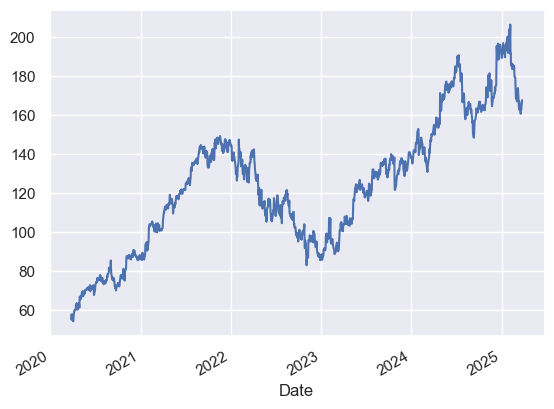

In [9]:
google['Close'].plot(kind='line');

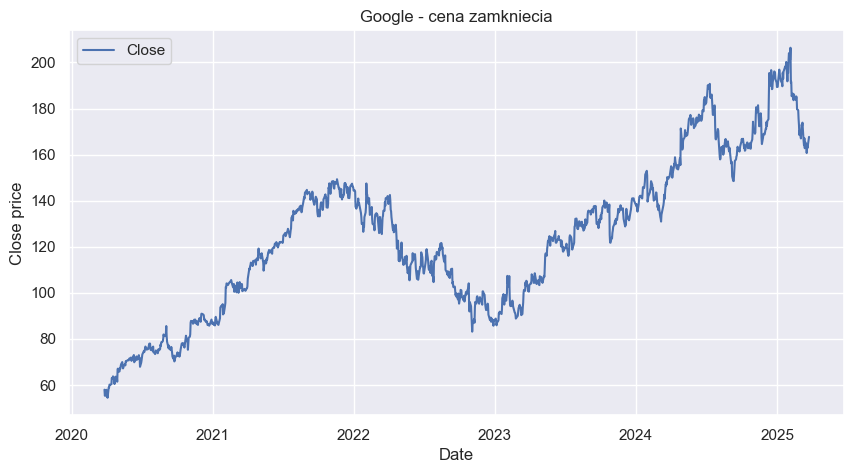

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(google.Close, label = "Close")
plt.title("Google - cena zamkniecia")
plt.xlabel("Date")
plt.ylabel("Close price")
plt.legend()
plt.grid(True)
plt.show()

### <a name='3'></a> Ćwiczenie 123
Zamień indeks _Date_ na kolumnę. Przypisz trwale zmiany do zniennej _google_.

In [10]:
google.reset_index(inplace=True)
google

,Date,Open,High,Low,Close,Volume
0,2025-03-24,167.06,168.32,165.14,167.68,30879129
1,2025-03-21,161.21,164.24,160.89,163.99,36625764
2,2025-03-20,161.57,164.89,160.96,162.80,28138464
3,2025-03-19,161.76,165.87,161.00,163.89,34275582
4,2025-03-18,163.68,164.25,156.72,160.67,42074751
...,...,...,...,...,...,...
1250,2020-04-01,56.00,56.27,54.48,54.91,52158777
1251,2020-03-31,57.23,58.46,56.63,57.89,65516064
1252,2020-03-30,56.43,57.34,54.73,57.11,58949465
1253,2020-03-27,56.17,57.34,55.00,55.31,63020851


Przypisz dwie nowe kolumny do obiektu _google_ dodając kolumnę z aktualnym numerem miesiąca o nazwie _'Month'_ oraz z rokiem o nazwie _'Year'_.

In [11]:
google['Month'] = google['Date'].dt.month
google['Year'] = google['Date'].dt.year
google

,Date,Open,High,Low,Close,Volume,Month,Year
0,2025-03-24,167.06,168.32,165.14,167.68,30879129,3,2025
1,2025-03-21,161.21,164.24,160.89,163.99,36625764,3,2025
2,2025-03-20,161.57,164.89,160.96,162.80,28138464,3,2025
3,2025-03-19,161.76,165.87,161.00,163.89,34275582,3,2025
4,2025-03-18,163.68,164.25,156.72,160.67,42074751,3,2025
...,...,...,...,...,...,...,...,...
1250,2020-04-01,56.00,56.27,54.48,54.91,52158777,4,2020
1251,2020-03-31,57.23,58.46,56.63,57.89,65516064,3,2020
1252,2020-03-30,56.43,57.34,54.73,57.11,58949465,3,2020
1253,2020-03-27,56.17,57.34,55.00,55.31,63020851,3,2020


### <a name='4'></a> Ćwiczenie 124
Policz średnią cenę zamknięcia (_Close_) dla poszczególnego roku (pogrupuj dane po roku - kolumna _Year_ i następnie policz wartość średnią).

In [12]:
srednia_per_rok = google.groupby('Year').mean(numeric_only=True).Close
srednia_per_rok

Year
2020    75.30
2021   123.78
2022   114.35
2023   118.37
2024   163.41
2025   183.18
Name: Close, dtype: float64

In [14]:
google

,Date,Open,High,Low,Close,Volume,Month,Year
0,2025-03-24,167.06,168.32,165.14,167.68,30879129,3,2025
1,2025-03-21,161.21,164.24,160.89,163.99,36625764,3,2025
2,2025-03-20,161.57,164.89,160.96,162.80,28138464,3,2025
3,2025-03-19,161.76,165.87,161.00,163.89,34275582,3,2025
4,2025-03-18,163.68,164.25,156.72,160.67,42074751,3,2025
...,...,...,...,...,...,...,...,...
1250,2020-04-01,56.00,56.27,54.48,54.91,52158777,4,2020
1251,2020-03-31,57.23,58.46,56.63,57.89,65516064,3,2020
1252,2020-03-30,56.43,57.34,54.73,57.11,58949465,3,2020
1253,2020-03-27,56.17,57.34,55.00,55.31,63020851,3,2020


In [15]:
srednia_roczna = google.groupby('Year')['Close'].mean().to_frame(name = 'Srednia cena zamkniecia')
srednia_roczna

,Srednia cena zamkniecia
Year,
2020,75.30
2021,123.78
2022,114.35
2023,118.37
2024,163.41
2025,183.18


Otrzymane wartości przedstaw na wykresie wykorzystując metodę _plot()_.

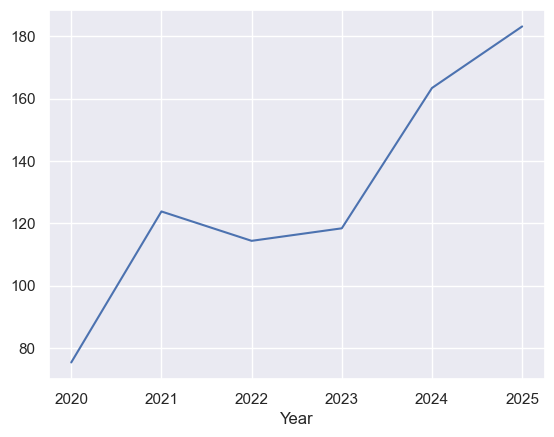

In [16]:
srednia_per_rok.plot(kind='line');

Policz średnią cenę zamknięcia (_Close_) dla miesiąca (pogrupuj dane po miesiącu - kolumna _Month_ i następnie policz wartość średnią).

In [17]:
srednia_per_msc = google.groupby('Month').mean(numeric_only=True).Close
srednia_per_msc

Month
1    131.84
2    132.40
3    123.11
4    113.24
5    117.72
6    119.12
7    123.92
8    125.18
9    121.68
10   123.23
11   126.52
12   129.00
Name: Close, dtype: float64

Otrzymane wartości przedstaw na wykresie wykorzystując metodę _plot()_.
Zauważ, które miesiące mogą wskazywać na słabsze okresy na giełdzie.

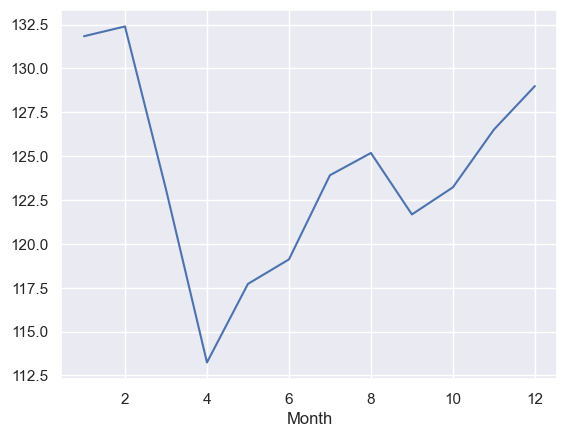

In [18]:
srednia_per_msc.plot(kind='line');

### <a name='5'></a> Ćwiczenie 125
Pogrupuj dane z obiektu _google_ na poziomie roku i miesiąca. Następnie policz wartość średnią.

In [19]:
srednia_per_rok_msc = google.groupby(['Year','Month']).mean(numeric_only=True)
srednia_per_rok_msc

Open   High    Low  Close      Volume
Year Month                                        
2020 3      56.34  57.88  55.19  57.06 66113205.75
     4      61.38  62.18  60.34  61.28 53731720.71
     5      68.62  69.54  67.97  68.82 36394958.35
     6      71.33  72.11  70.42  71.32 37148669.82
     7      75.23  76.26  74.41  75.49 37551026.00
...           ...    ...    ...    ...         ...
2024 11    173.18 174.77 171.44 173.38 26529902.30
     12    186.05 188.91 184.29 186.73 30750425.29
2025 1     195.00 197.47 193.28 195.34 25018769.25
     2     185.16 186.58 182.60 184.32 33129730.00
     3     166.24 168.72 163.94 166.61 34455944.06

[61 rows x 5 columns]

### <a name='6'></a> Ćwiczenie 126
Znajdź indeks dla którego kolumna _Close_ przyjmuje wartość największą.

In [20]:
google['Close'].idxmax()

33

Wytnij wiersz dla tego indeksu z obiektu _google_ jako obiekt DataFrame. Odczytaj datę.

In [22]:
google.iloc[google['Close'].idxmax()]

Date      2025-02-04 00:00:00
Open                   203.39
High                   207.05
Low                    202.81
Close                  206.38
Volume               43856425
Month                       2
Year                     2025
Name: 33, dtype: object

### <a name='7'></a> Ćwiczenie 127
Z obiektu _google_ wytnij kolumny _Date_, _Open_, _Close_, _Volume_.
Nie zmieniaj pierwotnego obiektu _google_!


In [24]:
google

,Date,Open,High,Low,Close,Volume,Month,Year
0,2025-03-24,167.06,168.32,165.14,167.68,30879129,3,2025
1,2025-03-21,161.21,164.24,160.89,163.99,36625764,3,2025
2,2025-03-20,161.57,164.89,160.96,162.80,28138464,3,2025
3,2025-03-19,161.76,165.87,161.00,163.89,34275582,3,2025
4,2025-03-18,163.68,164.25,156.72,160.67,42074751,3,2025
...,...,...,...,...,...,...,...,...
1250,2020-04-01,56.00,56.27,54.48,54.91,52158777,4,2020
1251,2020-03-31,57.23,58.46,56.63,57.89,65516064,3,2020
1252,2020-03-30,56.43,57.34,54.73,57.11,58949465,3,2020
1253,2020-03-27,56.17,57.34,55.00,55.31,63020851,3,2020


In [23]:
fragment_google = google[['Date', 'Open', 'Close', 'Volume']]
fragment_google

,Date,Open,Close,Volume
0,2025-03-24,167.06,167.68,30879129
1,2025-03-21,161.21,163.99,36625764
2,2025-03-20,161.57,162.80,28138464
3,2025-03-19,161.76,163.89,34275582
4,2025-03-18,163.68,160.67,42074751
...,...,...,...,...
1250,2020-04-01,56.00,54.91,52158777
1251,2020-03-31,57.23,57.89,65516064
1252,2020-03-30,56.43,57.11,58949465
1253,2020-03-27,56.17,55.31,63020851


### <a name='8'></a> Ćwiczenie 128
Ustaw z powrotem indeks dla kolumny _Date_. Wyświetl obiekt _google_.

In [26]:
google = google.set_index('Date')
google

,Open,High,Low,Close,Volume,Month,Year
Date,,,,,,,
2025-03-24,167.06,168.32,165.14,167.68,30879129,3,2025
2025-03-21,161.21,164.24,160.89,163.99,36625764,3,2025
2025-03-20,161.57,164.89,160.96,162.80,28138464,3,2025
2025-03-19,161.76,165.87,161.00,163.89,34275582,3,2025
2025-03-18,163.68,164.25,156.72,160.67,42074751,3,2025
...,...,...,...,...,...,...,...
2020-04-01,56.00,56.27,54.48,54.91,52158777,4,2020
2020-03-31,57.23,58.46,56.63,57.89,65516064,3,2020
2020-03-30,56.43,57.34,54.73,57.11,58949465,3,2020


### <a name='9'></a> Ćwiczenie 129
Usuń na stałe kolumny _Year_ i _Month_ z obiektu _google_. Wyświetl obiekt _google_.

In [27]:
google.drop(['Year','Month'], axis=1, inplace=True)
google

,Open,High,Low,Close,Volume
Date,,,,,
2025-03-24,167.06,168.32,165.14,167.68,30879129
2025-03-21,161.21,164.24,160.89,163.99,36625764
2025-03-20,161.57,164.89,160.96,162.80,28138464
2025-03-19,161.76,165.87,161.00,163.89,34275582
2025-03-18,163.68,164.25,156.72,160.67,42074751
...,...,...,...,...,...
2020-04-01,56.00,56.27,54.48,54.91,52158777
2020-03-31,57.23,58.46,56.63,57.89,65516064
2020-03-30,56.43,57.34,54.73,57.11,58949465


### <a name='10'></a> Ćwiczenie 130
Przypisz polskie nazwy kolumn (bez polskich znaków):
* Open -> Otwarcie
* High -> Najwyzszy
* Low -> Najnizszy
* Close -> Zamkniecie
* Volume -> Wolumen

do obiektu _google_. Wyświetl obiekt _google_.

In [28]:
google.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [29]:
google.columns = ['Otwarcie', 'Najwyzszy', 'Najnizszy', 'Zamkniecie', 'Wolumen']
google

,Otwarcie,Najwyzszy,Najnizszy,Zamkniecie,Wolumen
Date,,,,,
2025-03-24,167.06,168.32,165.14,167.68,30879129
2025-03-21,161.21,164.24,160.89,163.99,36625764
2025-03-20,161.57,164.89,160.96,162.80,28138464
2025-03-19,161.76,165.87,161.00,163.89,34275582
2025-03-18,163.68,164.25,156.72,160.67,42074751
...,...,...,...,...,...
2020-04-01,56.00,56.27,54.48,54.91,52158777
2020-03-31,57.23,58.46,56.63,57.89,65516064
2020-03-30,56.43,57.34,54.73,57.11,58949465
